## Project Description

## Notebook Description

### Initialize packages and read in pickled data

In [1]:
% run __init__.py

In [2]:
cd ..

/home/jovyan


In [10]:
df_in_play = pd.read_pickle('data/in_play.p')

In [11]:
df_in_play.shape

(127052, 18)

In [3]:
df_model = pd.read_pickle('data/df_model.p')

In [4]:
df_model.shape

(127052, 88)

### Outlier Analysis

In [12]:
df_in_play_stats = df_in_play.describe().T

In [13]:
df_in_play_stats.drop(['player_id'], axis=0, inplace=True)

In [14]:
df_in_play_stats

,count,mean,std,min,25%,50%,75%,max
mph,127052.0,88.816898,5.825538,36.400,84.900,90.200,93.2000,103.20
ev_mph,127052.0,86.637634,15.153937,0.000,79.900,89.100,97.9000,122.20
dist,127052.0,153.049767,139.895645,0.000,9.000,130.000,283.0000,495.00
spin_rate,127052.0,2145.965487,438.706581,88.000,2039.000,2210.000,2373.0000,3666.00
launch_angle,127052.0,11.122158,27.557570,-84.987,-8.428,11.389,29.1635,89.85


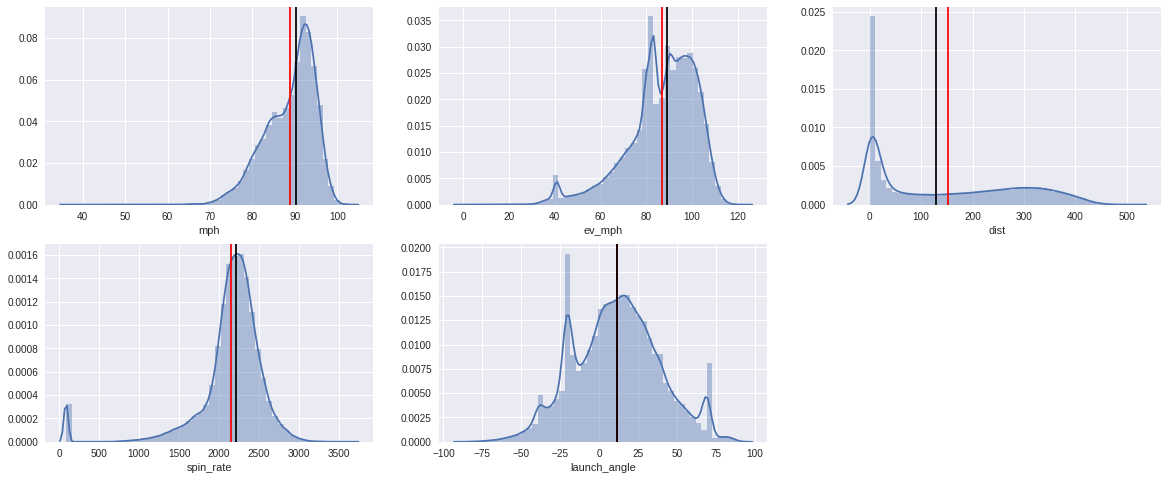

In [15]:
fig = plt.figure(figsize=(20,8))

for i, num_col in enumerate(df_in_play_stats.index):
    fig.add_subplot(2,3,1+i)
    sns.distplot(df_in_play[num_col])
    
    mean_value = df_in_play[num_col].mean()
    plt.axvline(mean_value, c='red')
    
    median_value = df_in_play[num_col].median()
    plt.axvline(median_value, c='black')

In [6]:
df_model['spin_rate'].value_counts()

88      2922
2243     249
2223     245
2195     241
2194     235
2257     233
2192     232
2191     231
2222     227
2298     227
2307     226
2172     226
2275     225
2219     224
2144     223
2116     223
2215     223
2154     221
2200     220
2128     220
2263     220
2268     219
2229     219
2225     219
2153     219
2177     219
2287     219
2270     218
2262     217
2294     217
        ... 
906        1
3283       1
3155       1
3118       1
943        1
879        1
815        1
3080       1
905        1
3545       1
3209       1
3282       1
3263       1
3199       1
3218       1
860        1
3026       1
968        1
3145       1
787        1
954        1
3337       1
3067       1
3569       1
1022       1
681        1
1008       1
2993       1
3353       1
1058       1
Name: spin_rate, dtype: int64

In [8]:
df_model[df_model['launch_angle'] == 39.2990]['hit_flag'].value_counts()

False    580
True       1
Name: hit_flag, dtype: int64

In [9]:
df_model['launch_angle'].value_counts()

-20.6990    5955
 69.0000    3357
-39.0000    1129
-17.3000    1106
 39.2990     581
-36.0000     291
-13.0000     159
 14.6000     132
 18.1990     128
-21.0000     101
 17.1000      96
 30.1990      58
 18.0000      57
 39.0000      55
 15.0000      48
 32.0000      33
-17.0000      32
 30.0000      29
 23.6990      24
 36.0000      24
-3.0000       18
 17.0000      17
 24.0000      17
 67.0000      16
 38.0000      15
-62.0000      14
 65.0000      13
 31.0000      12
 0.0000       12
 60.0000      10
            ... 
 55.4620       1
 37.1690       1
 3.2320        1
 8.7050        1
-2.3060        1
 54.3130       1
-16.6520       1
 24.7200       1
-11.1340       1
 20.7240       1
 56.3290       1
-9.1060        1
 45.3890       1
 37.8061       1
 39.1050       1
-39.1450       1
-34.2200       1
-24.9490       1
 11.8780       1
 24.9260       1
-30.7360       1
 52.7290       1
-8.5230        1
-8.3820        1
 7.5440        1
-2.8870        1
 80.5260       1
 82.6040      